In [1]:
# General
import os
import pandas as pd
import numpy as np
import math
import sys
import time
import pickle
import json
import datetime
import random
import seaborn as sns

#import sklearn
import sklearn
from sklearn import *

#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load a set of pickle files, put them together in a single DataFrame, and order them by time
# It takes as input the folder DIR_INPUT where the files are stored, and the BEGIN_DATE and END_DATE
def read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE):
    
    files = [os.path.join(DIR_INPUT, f) for f in os.listdir(DIR_INPUT) if f>=BEGIN_DATE+'.pkl' and f<=END_DATE+'.pkl']

    frames = []
    for f in files:
        df = pd.read_pickle(f)
        frames.append(df)
        del df
    df_final = pd.concat(frames)
    
    df_final=df_final.sort_values('TRANSACTION_ID')
    df_final.reset_index(drop=True,inplace=True)
    #  Note: -1 are missing values for real world data 
    df_final=df_final.replace([-1],0)
    
    return df_final

In [3]:
DIR_INPUT='../simulated-data-transformed/data/' 

BEGIN_DATE = "2018-04-01"
END_DATE = "2018-09-30"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
Wall time: 17.7 s
1754155 transactions loaded, containing 14681 fraudulent transactions


In [4]:
transactions_df.head()


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
transactions_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 23 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   TRANSACTION_ID                       int64         
 1   TX_DATETIME                          datetime64[ns]
 2   CUSTOMER_ID                          int64         
 3   TERMINAL_ID                          int64         
 4   TX_AMOUNT                            float64       
 5   TX_TIME_SECONDS                      int64         
 6   TX_TIME_DAYS                         int64         
 7   TX_FRAUD                             int64         
 8   TX_FRAUD_SCENARIO                    int64         
 9   TX_DURING_WEEKEND                    int64         
 10  TX_DURING_NIGHT                      int64         
 11  CUSTOMER_ID_NB_TX_1DAY_WINDOW        float64       
 12  CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW   float64       
 13  CUSTOMER_ID_NB_TX_7DAY_WIND

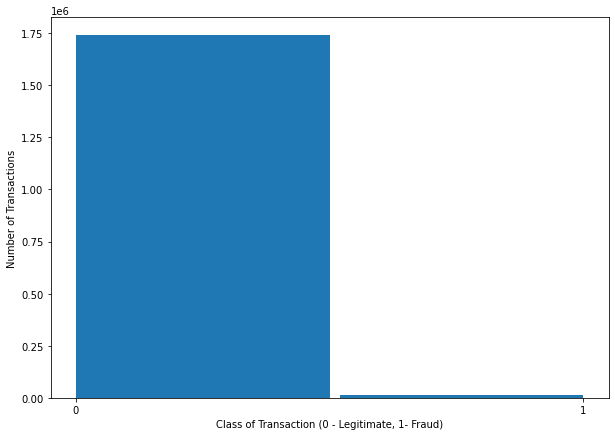

In [6]:
x=transactions_df["TX_FRAUD"]
# Creating histogram
bins=np.linspace(0, 1, num=3)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(x,bins=[0,0.5,0.52,1])
plt.xlabel("Class of Transaction (0 - Legitimate, 1- Fraud)")
plt.ylabel("Number of Transactions")
plt.xticks([0,1])
# Show plot
plt.show()

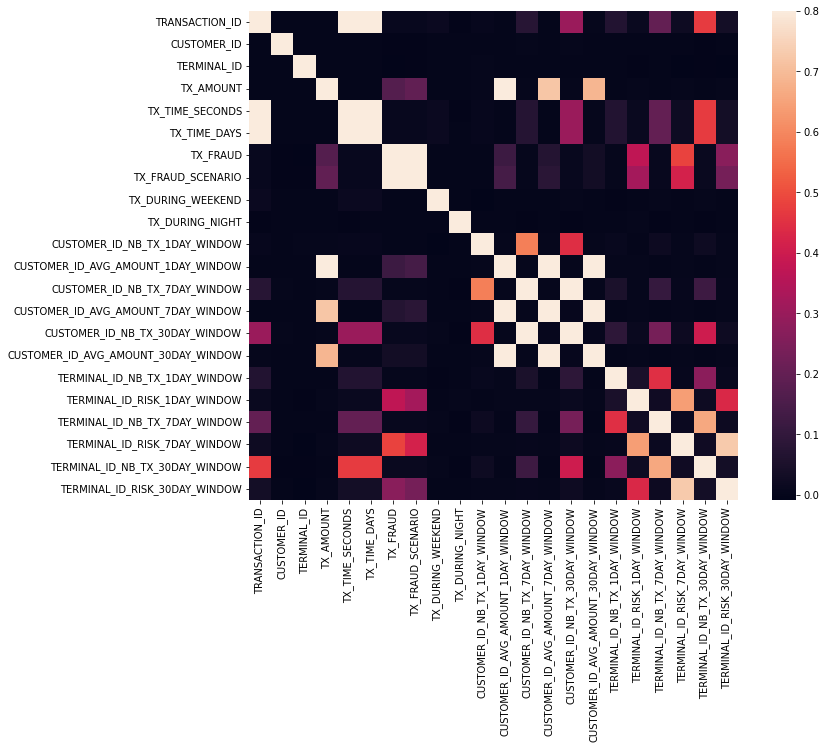

In [7]:
# Correlation matrix
corrmat = transactions_df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [8]:
# dividing the X and the Y from the dataset
X = transactions_df.drop(['TX_FRAUD'], axis = 1)
Y = transactions_df["TX_FRAUD"]
X=X.drop(['TX_DATETIME'],axis=1)
X=X.drop(['TX_FRAUD_SCENARIO'],axis=1)
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(1754155, 20)
(1754155,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
clf=DecisionTreeClassifier()
xTrain, xTest, yTrain, yTest = train_test_split(
        X, Y, test_size = 0.2, random_state = 42)
clf.fit(xTrain,yTrain)



In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
  
fraud=14681
yPred=clf.predict(xTest)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))
  
rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))
  
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(50,30))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=["Legitimate","Fraud"],
                   filled=True)

In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        X, Y, test_size = 0.2, random_state = 42)

In [51]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [52]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
  
fraud=14681
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))
  
rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))
  
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
The Matthews correlation coefficient is1.0


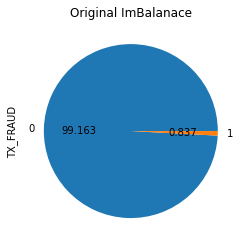

In [53]:
#distribution before undersampling
ax = Y.value_counts().plot.pie(autopct='%.3f')
_ = ax.set_title("Original ImBalanace")

In [19]:
#class distribution
Y.value_counts()

0    1739474
1      14681
Name: TX_FRAUD, dtype: int64

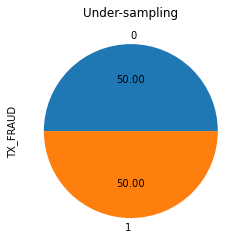

In [43]:
# Random Undersampling 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, Y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [44]:
#class distribution
y_res.value_counts()

0    14681
1    14681
Name: TX_FRAUD, dtype: int64

In [54]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
drop_indices = np.random.choice(y_res.index, 7000, replace=False)
xTrain, xTest, yTrain, yTest = train_test_split(
        X_res, y_res, test_size = 0.4)

In [55]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc_rus = RandomForestClassifier()
rfc_rus.fit(xTrain, yTrain)
# predictions
yPred_res = rfc_rus.predict(xTest)

In [56]:
fraud=14681
n_errors = (yPred_res != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred_res)
print("The accuracy is {}".format(acc))
  
prec = precision_score(yTest, yPred_res)
print("The precision is {}".format(prec))
  
rec = recall_score(yTest, yPred_res)
print("The recall is {}".format(rec))
  
f1 = f1_score(yTest, yPred_res)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(yTest, yPred_res)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest classifier
The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
The Matthews correlation coefficient is 1.0


However even after doing undersampling, we see that the performance metrics are blatantly 100%.
Now this might be correct but before drawing any conclusion about our model we need to understand the performance metrics in use. 
The recall, specificity, precision, and F1 score metrics, also known as threshold-based metrics, have well-known limitations due to their dependence on a decision threshold which is difficult to determine in practice, and strongly depends on the business-specific constraints.
Hence to present an appropriate image of our model we need to use threshhold free metrics such as AUC ROC and AP, for our analysis.